In [1]:
from file_reader import *
from collections import defaultdict
import matplotlib.pyplot as plt, numpy

mass_1025 = 0.002796
Cs_1gpL = 1/58.43
Cs_10gpL = Cs_1gpL*10

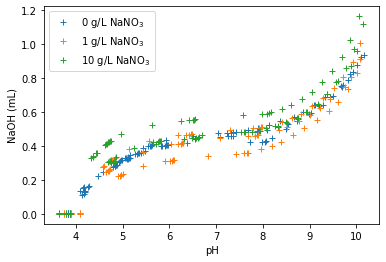

In [4]:
fig = plt.figure()

zeros = [TitrationData('input_data/1025/PC_LIMS_Report-20201026-135736.txt', '200uL_0gpL_1', 0.10051, 0, mass_1025, -0.1),
         TitrationData('input_data/1025/PC_LIMS_Report-20201026-150929.txt', '200uL_0gpL_2', 0.10051, 0, mass_1025, -0.1),
         TitrationData('input_data/1025/PC_LIMS_Report-20201026-161307.txt', '200uL_0gpL_3', 0.100484, 0, mass_1025, -0.1)]

ones = [TitrationData('input_data/1025/PC_LIMS_Report-20201026-142327.txt', '200uL_1gpL_1', 0.100448, Cs_1gpL, mass_1025, -0.1),
        TitrationData('input_data/1025/PC_LIMS_Report-20201026-153131.txt', '200uL_1gpL_2', 0.100434, Cs_1gpL, mass_1025, -0.1),
        TitrationData('input_data/1025/PC_LIMS_Report-20201026-163102.txt', '200uL_1gpL_3', 0.100532, Cs_1gpL, mass_1025, -0.1)]

tens = [TitrationData('input_data/1025/PC_LIMS_Report-20201026-144820.txt', '200uL_10gpL_1', 0.10059, Cs_10gpL, mass_1025, -0.1),
        TitrationData('input_data/1025/PC_LIMS_Report-20201026-154919.txt', '200uL_10gpL_2', 0.10067, Cs_10gpL, mass_1025, -0.1),
        TitrationData('input_data/1025/PC_LIMS_Report-20201026-165047.txt', '200uL_10gpL_3', 0.100588, Cs_10gpL, mass_1025, -0.1)]

concs = [zeros, ones, tens]
concs_names = ['zeros', 'ones', 'tens']
colours = ['tab:blue', 'tab:orange', 'tab:green']
label_list = ['0 g/L NaNO$_3$', '1 g/L NaNO$_3$', '10 g/L NaNO$_3$']
salts = defaultdict(dict) 

for i in range(len(concs)):
    source = salts[concs_names[i]]
    source['d'] = concs[i] # 'd' is for data list defined above 
    source['c'] = colours[i] # 'c' is the colour specified
    source['l'] = label_list[i] # 'l' is for label
    
for salt in salts:
    conc = salts[salt]
    for run in range(len(conc['d'])):
        data = conc['d'][run].df
        plt.plot(data.pH, data.vol, color=conc['c'], marker='+', linewidth=0, label=conc['l'] if run == 0 else "")

plt.legend()
plt.xlabel('pH')
plt.ylabel('NaOH (mL)')
plt.show()
fig.savefig('ionic_fx.png', dpi=600)